## Mapas vetoriales Region Metropolitana
Por: Marcelo Rovai @2Oct18

### Dataset:
#### Coberturas SIG de Chile
Region Metroplitana de Chile <br>
http://www.rulamahue.cl/mapoteca/fichas/chile_geo/ficha13geo.html
<p>bajar: Unidades administrativas (Shapefile) - Comunas</p>
http://www.rulamahue.cl/mapoteca/coberturas/chile_geo/cl_13comunas_geo.zip

### Para instalar pyshp: 
`pip install pyshp`

In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt

In [2]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [3]:
def plot_shape(id):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 

    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [45]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

In [46]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

In [47]:
def plot_map_fill(id, sf, x_lim = None, y_lim = None, figsize = (11,9), color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

In [10]:
!ls ./cl_13comunas_geo

cl_13comunas_geo.dbf cl_13comunas_geo.prj cl_13comunas_geo.shx
cl_13comunas_geo.odt cl_13comunas_geo.shp


In [11]:
shp_path = "./cl_13comunas_geo/cl_13comunas_geo.shp"
sf = shp.Reader(shp_path)

In [12]:
print ('number of shapes imported:',len(sf.shapes()))
print ('geometry attributes in each shape:')
for name in dir(sf.shape()):
    if not name.startswith('__'):
       print (name)

number of shapes imported: 52
geometry attributes in each shape:
bbox
parts
points
shapeType


In [48]:
sf.records()[0]

['13101', 'Santiago']

In [49]:
df = read_shapefile(sf)
df.shape

(52, 3)

In [17]:
df.head(2)

,ID,NOMBRE,coords
0,13101,Santiago,"[(-70.67431, -33.426627), (-70.672235, -33.427..."
1,13102,Cerillos,"[(-70.722892, -33.473646), (-70.722368, -33.47..."


In [40]:
df

,ID,NOMBRE,coords
0,13101,Santiago,"[(-70.67431, -33.426627), (-70.672235, -33.427..."
1,13102,Cerillos,"[(-70.722892, -33.473646), (-70.722368, -33.47..."
2,13103,Cerro Navia,"[(-70.722454, -33.438461), (-70.726434, -33.43..."
3,13104,Conchali,"[(-70.689819, -33.366518), (-70.684535, -33.36..."
4,13105,El Bosque,"[(-70.685513, -33.539533), (-70.668537, -33.54..."
5,13106,Estacion Central,"[(-70.733923, -33.469957), (-70.723914, -33.46..."
6,13109,La Cisterna,"[(-70.685513, -33.539533), (-70.671051, -33.51..."
7,13110,La Florida,"[(-70.613075, -33.509036), (-70.612871, -33.50..."
8,13111,La Granja,"[(-70.636825, -33.519025), (-70.626392, -33.51..."
9,13112,La Pintana,"[(-70.664162, -33.585478), (-70.655777, -33.55..."


In [50]:
df[df.NOMBRE == 'Santiago']

,ID,NOMBRE,coords
0,13101,Santiago,"[(-70.67431, -33.426627), (-70.672235, -33.427..."


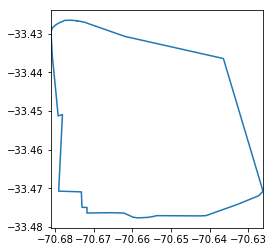

In [51]:
# Plot Comuna
comuna = 'Santiago'
com_id = df[df.NOMBRE == comuna].index.get_values()[0]
plot_shape(com_id)

In [52]:
com_id

0

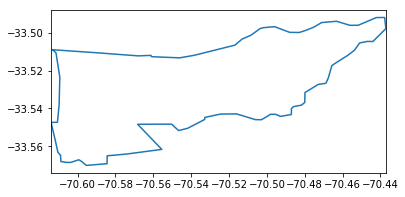

In [53]:
# Plot Comuna
comuna = "La Florida"
com_id = df[df.NOMBRE == comuna].index.get_values()[0]
plot_shape(com_id)

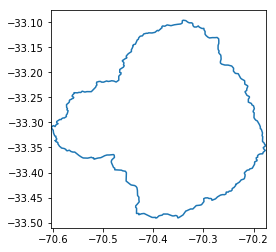

In [55]:
# Plot Comuna
comuna = "Lo Barnechea"
com_id = df[df.NOMBRE == comuna].index.get_values()[0]
plot_shape(com_id)

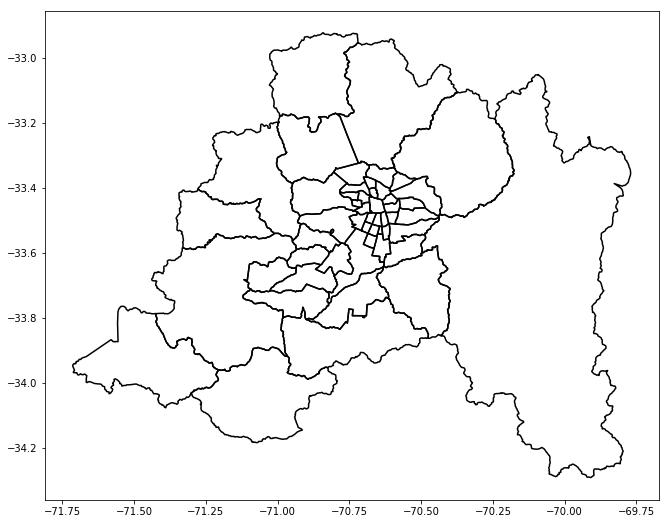

In [54]:
plot_map(sf)

In [27]:
# Limites aproximados provincia Santiago (RM)
y_lim = (-33.7,-33.3) # lat 
x_lim = (-71, -70.25) # long

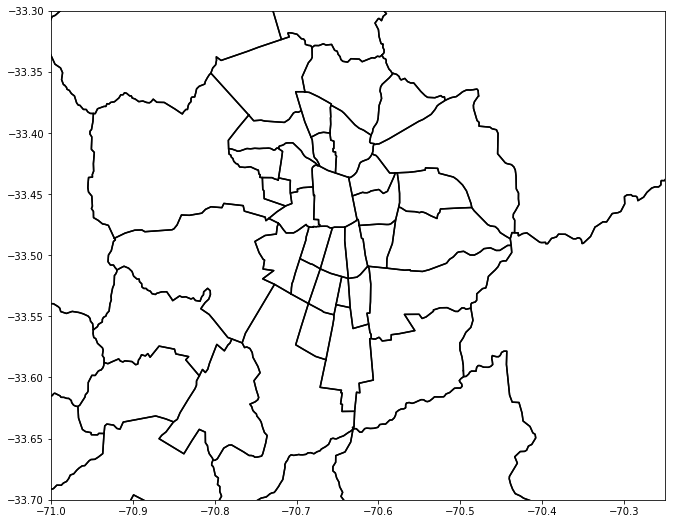

In [30]:
plot_map(sf, x_lim, y_lim

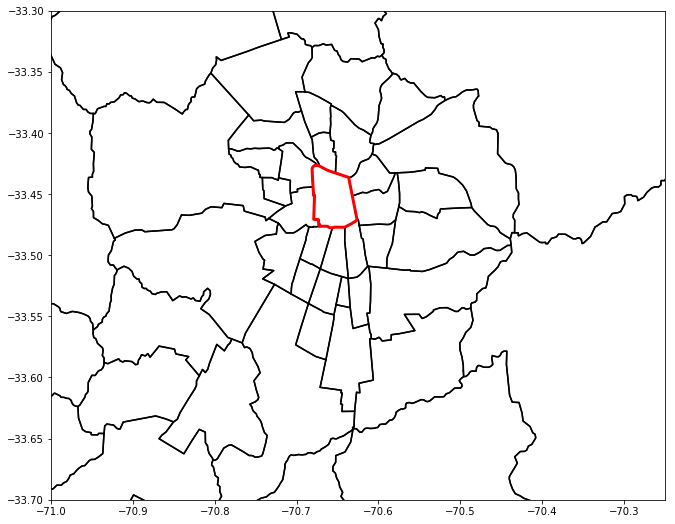

In [58]:
plot_map2(0, sf, x_lim, y_lim)

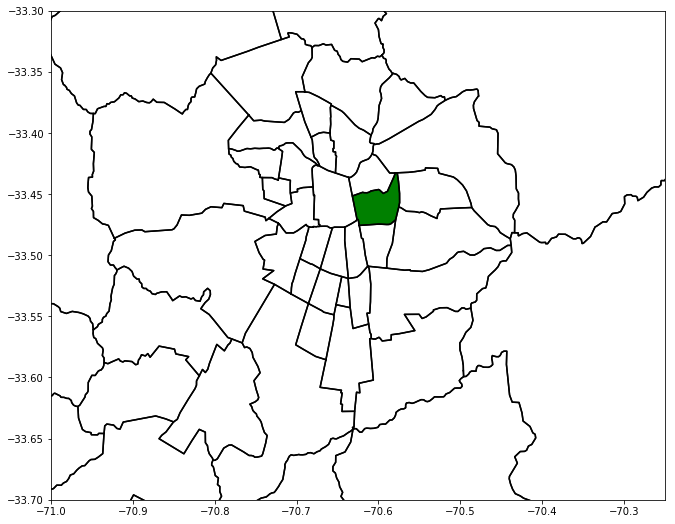

In [59]:
plot_map_fill(14, sf, x_lim, y_lim, color='g')